Um paradigma de programação é um estilo e programação. Não é uma linguagem (Python, Java, C, etc), e sim a forma como você soluciona os problemas através do código. O paradigma de programação orientada a objetos estrutura o código abstraindo problemas em objetos do mundo real, facilitando o entendimento do código e tornando-o mais modular e extensível. 


## Classes

Uma classe define as características e comportamentos de um objeto, porém não conseguimos usá-las diretamente. Já os objetos podemos usá-los e eles possuem as características e comportamentos que foram definidos nas classes.


Para definir uma classe é necessário usar a palavra reservada ````class````
````
    class nome_classe:
        pass
````

````self```` é uma referência explicita do objeto, ou seja, é a instância do objeto. Em python, a referência é explicita. E a variável ````self```` pode assumir outros valores, contudo convenciona-se esse nome.

Métodos são criados usando o comando ````def````

In [15]:
class nome_classe:
    def __init__(self,atributo_1,atributo_2):
        self.atributo_1 = atributo_1
        self.atributo_2 = atributo_2
    
    def metado_1(self):
        return self.atributo_1 + self.atributo_2


Para acessar os métodos e atributos da classe basta instanciar a classe

In [16]:
instancia = nome_classe(1,2)
print(f'Método: {instancia.metado_1()}\nAtributo 1: {instancia.atributo_1}\nAtributo 2: {instancia.atributo_2}')

Método: 3
Atributo 1: 1
Atributo 2: 2


Outra maneira é instanciar o objeto e chamar o objeto.

In [ ]:
instancia = nome_classe(1,2)
nome_classe.metado_1(instancia)

Para representar a classe ao usuário é possível criar o método ````__str__````

In [7]:
class nome_classe:
    def __init__(self,atributo_1,atributo_2):
        self.atributo_1 = atributo_1
        self.atributo_2 = atributo_2
    
    def metado_1(self):
        return self.atributo_1 + self.atributo_2

    def __str__(self):
        return f"{self.__class__.__name__}: {[f'{chave}={valor}' for chave,valor in self.__dict__.items()]}"

In [9]:
instancia = nome_classe(1,2)
print(f"Tipo da classe -  {instancia}")

Tipo da classe -  nome_classe: ['atributo_1=1', 'atributo_2=2']


Um das principais vantagens da declaração explicita da instância do objeto é com custler no método.
É possível definir função dentro de função e método dentro de método.


In [10]:
class nome_classe:
    def __init__(self,atributo_1,atributo_2):
        self.atributo_1 = atributo_1
        self.atributo_2 = atributo_2
    
    def metado_1(self):
        def soma(a,b):
            return a+b
        return soma(self.atributo_1, self.atributo_2)

    def __str__(self):
        return f"{self.__class__.__name__}: {[f'{chave}={valor}' for chave,valor in self.__dict__.items()]}"

### Construtores e destrutores

O construtor sempre é executado quando uma nova instância da classe é criada. Nesse método inicializamos o estado do nosso objeto. O método construtor é dados pelo método ```` __init__()````

In [11]:
class nome_classe:
    def __init__(self,atributo_1,atributo_2):
        self.atributo_1 = atributo_1
        self.atributo_2 = atributo_2
    

Já os destrutores são executados sempre que uma instância é destruída. Embora o python tenha um coletor de lixo que lida com o gerenciamento de memória, o método destrutor desaloca da memória a instância e executa alguma ação. O método é declarado com o nome ````__del__````

In [19]:
class nome_classe:
    def __init__(self,atributo_1,atributo_2):
        self.atributo_1 = atributo_1
        self.atributo_2 = atributo_2
    def __del__(self):
        print('Destruindo a instância')

def funcao():
    instancia = nome_classe(1,1)

funcao()

Destruindo a instância


## Herança

herança é a capacidade de uma classe filha derivar ou herdar as características e comportamentos da classe pai (base).

Os principais benefícios são:

    - Representa bem os relacionamentos do mundo real.

    - Fornece reutilização de código, não precisamos escrever o mesmo código repetidamente. Além disso, permite adicionar mais recursos a uma classe sem modificá-la.
    
    - É de natureza transitiva, o que significa que, se a classe B herdar da classe A, todas as subclasses de B herdarão automaticamente da classe A.
    


Um exemplo herança simples é a classe B herdar a classe A:
````
    class A:
        pass
    
    class B(A):
        pass
````

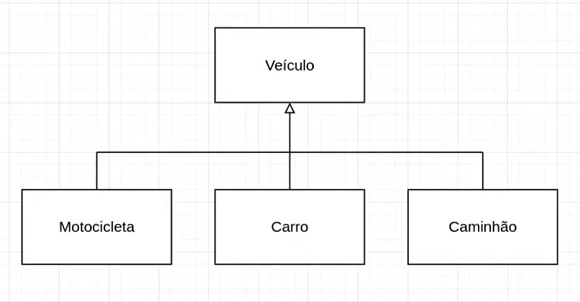

In [33]:
class Veiculo:
    def __init__(self, cor, placa, rodas):
        self.cor = cor
        self.placa = placa
        self.rodas = rodas
    
    def ligar(self):
        print('motor ligado')

    def __str__(self):
        return f"{self.__class__.__name__}: {[f'{chave}={valor}' for chave,valor in self.__dict__.items()]}"
    

class Moto(Veiculo):
    pass

class Carro(Veiculo):
    pass


class Caminhao(Veiculo):
    # Definir um novo construtor
    def __init__(self, cargas, **kw):
        # Passa na inicializador do pai os argumentos keywords
        super().__init__(**kw)
        self.cargas = cargas


    def carga(self):
        if self.cargas:
            print('Está carregado')
        else:
            print('Descarregado')

In [34]:
caminhao = Caminhao(True, 
                    cor='rosa', 
                    placa = '1234',  
                    rodas = 6)

carro = Carro('preto','2222',4)
moto = Moto('preto','3333',2)
caminhao.ligar()

motor ligado


In [32]:
print(moto)
print(carro)
print(caminhao)

Moto: ['cor=preto', 'placa=3333', 'rodas=2']
Carro: ['cor=preto', 'placa=2222', 'rodas=4']
Caminhao: ['cor=rosa', 'placa=1234', 'rodas=6', 'cargas=True']


### Herança multiplas

A herança multipla é quando uma classe filha herda de várias classes pai. Em python isso ocorre defindo:
````
    class A:
        pass
    
    class B:
        pass
    
    class C(A,B):
        pass
````

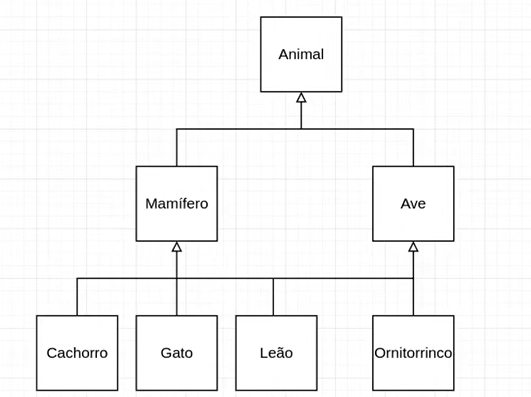

Para a inicialização das classes de herança multiplas, é necessário utilizar os parâmetros keywords. cuidado ao usar esse formato, já que dificulta a manutenção e a vizibilidade do código.

In [ ]:
class Animal:
    def __init__(self, nro_patas):
        self.nro_patas = nro_patas

    def __str__(self):
        return f"{self.__class__.__name__}: {', '.join([f'{chave}={valor}' for chave, valor in self.__dict__.items()])}"


class Mamifero(Animal):
    def __init__(self, cor_pelo, **kw):
        self.cor_pelo = cor_pelo
        super().__init__(**kw)


class Ave(Animal):
    def __init__(self, cor_bico, **kw):
        self.cor_bico = cor_bico
        super().__init__(**kw)


class Gato(Mamifero):
    pass


class Ornitorrinco(Mamifero, Ave):
    def __init__(self, cor_bico, cor_pelo, nro_patas):
        super().__init__(cor_pelo=cor_pelo, cor_bico=cor_bico, nro_patas=nro_patas)

In [ ]:
gato = Gato(nro_patas=4, cor_pelo="Preto")
print(gato)

ornitorrinco = Ornitorrinco(nro_patas=2, cor_pelo="vermelho", cor_bico="laranja")
print(ornitorrinco)


## Encapsulamento

O encapsulamento descreve a ideia de agrupar dados e os métodos que manipulam esses dados em uma unidade. Isso impõe restrições ao acesso direto a variáveis ​​e métodos e pode evitar a modificação acidental de dados. Para evitar alterações acidentais, a variável de um objeto só pode ser alterada pelo método desse objeto. 

Definção de encapsulamento atributos/métodos: 

    - Público: Pode ser acessado de fora da classe.

    - Privado: Só pode ser acessado pela classe.

A imagem abaixo ilustra o uso do atributo saldo ser definido como um atributo privado da classe conta.

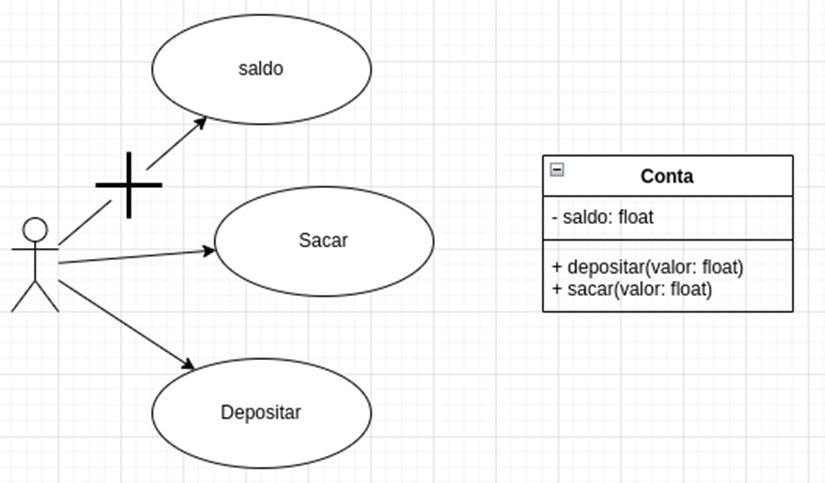

Em Python não temos palavras reservadas, porém usamos convenções no nome do recurso, para definir se a variável é pública ou privada. Assim, todos os recursos são públicos, a menos que o nome inicie com underline. Ou seja, o interpretador Python não irá garantir a proteção do recurso, mas por ser uma convenção amplamente adotada na comunidade, quando encontramos uma variável e/ou método com nome iniciado por underline, sabemos que não deveríamos manipular o seu valor diretamente, ou invocar o método fora do escopo da classe.



In [5]:
class Conta:
    def __init__(self, saldo=0):       
        self._saldo = saldo    
    
    def depositar(self,valor):        
        self._saldo += valor

    def sacar(self,valor):
        self._saldo -= valor
    
    def view_saldo(self):
        return self._saldo

conta = Conta(100)

conta._saldo==100

print(conta._saldo)

100


## Propriedades

Com o ````property()```` do Python, você pode criar atributos gerenciados em suas classes. Você pode usar atributos gerenciados, também conhecidos como propriedades, quando precisar modificar sua implementação interna sem alterar a API pública da classe. Atributos gerenciaveis das classes. Para métodos, transforma ele em uma propriedade que retorna um valor ao ser chamado pela instância.

In [6]:
class Foo:
    def __init__(self, x=None):
        self._x = x
    
    @property
    def x(self):
        return self._x or 0
    
    @x.setter
    def x(self, value):
        _x = self._x or 0
        _value = value or 0
        self._x = _x + _value
    
    @x.deleter
    def x(self):
        self._x = -1

foo = Foo(10)
print(foo.x)
foo.x = 10
print(foo.x)
del foo.x
print(foo.x)


10
20
-1
